In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
file_one = "Draft_data/Draft_2003_2020_merge.csv"

In [3]:
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [4]:
file_one_df.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College
0,1,1,CIN,Carson Palmer,QB,23.0,2017.0,0,3,12,...,301.0,474.0,8.0,0.0,0.0,0.0,1.0,NaN,NaN,USC
1,1,2,DET,Charles Rogers,WR,22.0,2005.0,0,0,0,...,2.0,17.0,0.0,36.0,440.0,4.0,NaN,NaN,NaN,Michigan St.
2,1,3,HOU,Andre Johnson,WR,22.0,2016.0,2,7,12,...,23.0,54.0,0.0,1062.0,14185.0,70.0,1.0,NaN,NaN,Miami (FL)
3,1,4,NYJ,Dewayne Robertson,DT,21.0,2008.0,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,195.0,NaN,16.0,Kentucky
4,1,5,DAL,Terence Newman,DB,25.0,2017.0,0,2,15,...,1.0,4.0,0.0,0.0,0.0,0.0,749.0,42.0,2.0,Kansas St.


In [5]:
file_one_df=file_one_df.fillna(0)

In [6]:
# file_one_df.drop(['Sk'], axis=1, inplace=True)

In [7]:
file_one_df.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College
0,1,1,CIN,Carson Palmer,QB,23.0,2017.0,0,3,12,...,301.0,474.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,USC
1,1,2,DET,Charles Rogers,WR,22.0,2005.0,0,0,0,...,2.0,17.0,0.0,36.0,440.0,4.0,0.0,0.0,0.0,Michigan St.
2,1,3,HOU,Andre Johnson,WR,22.0,2016.0,2,7,12,...,23.0,54.0,0.0,1062.0,14185.0,70.0,1.0,0.0,0.0,Miami (FL)
3,1,4,NYJ,Dewayne Robertson,DT,21.0,2008.0,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,195.0,0.0,16.0,Kentucky
4,1,5,DAL,Terence Newman,DB,25.0,2017.0,0,2,15,...,1.0,4.0,0.0,0.0,0.0,0.0,749.0,42.0,2.0,Kansas St.


In [8]:
file_one_df.columns

Index(['Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To', 'AP1', 'PB', 'St',
       'CareerAV', 'DraftedAV', 'GamesPlayed', 'Pass Completions',
       'Pass Attempts', 'Passing Yards', 'Passing Touchdowns',
       'Thrown Interceptions', 'Rushing Attempts', 'Rushing Yards',
       'Rushing Touchdowns', 'Receptions', 'Receiving Yards',
       'Receiving Touchdowns', 'Solo', 'Interceptions (DEF)', 'Sacks',
       'College'],
      dtype='object')

In [9]:
df_check=file_one_df.iloc[:,13:27].div(file_one_df.GamesPlayed, axis=0)

In [10]:
df_check.columns

Index(['Pass Completions', 'Pass Attempts', 'Passing Yards',
       'Passing Touchdowns', 'Thrown Interceptions', 'Rushing Attempts',
       'Rushing Yards', 'Rushing Touchdowns', 'Receptions', 'Receiving Yards',
       'Receiving Touchdowns', 'Solo', 'Interceptions (DEF)', 'Sacks'],
      dtype='object')

In [11]:
file_one_df['Pass Completions']=df_check['Pass Completions']
file_one_df['Pass Attempts']=df_check['Pass Attempts']
file_one_df['Passing Yards']=df_check['Passing Yards']
file_one_df['Passing Touchdowns']=df_check['Passing Touchdowns']
file_one_df['Thrown Interceptions']=df_check['Thrown Interceptions']
file_one_df['Rushing Attempts']=df_check['Rushing Attempts']
file_one_df['Rushing Yards']=df_check['Rushing Yards']
file_one_df['Rushing Touchdowns']=df_check['Rushing Touchdowns']
file_one_df['Receptions']=df_check['Receptions']
file_one_df['Receiving Yards']=df_check['Receiving Yards']
file_one_df['Receiving Touchdowns']=df_check['Receiving Touchdowns']
file_one_df['Solo']=df_check['Solo']
file_one_df['Interceptions (DEF)']=df_check['Interceptions (DEF)']
file_one_df['Sacks']=df_check['Sacks']



In [12]:
file_one_df.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College
0,1,1,CIN,Carson Palmer,QB,23.0,2017.0,0,3,12,...,1.653846,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,USC
1,1,2,DET,Charles Rogers,WR,22.0,2005.0,0,0,0,...,0.133333,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,Michigan St.
2,1,3,HOU,Andre Johnson,WR,22.0,2016.0,2,7,12,...,0.119171,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,Miami (FL)
3,1,4,NYJ,Dewayne Robertson,DT,21.0,2008.0,0,0,6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,Kentucky
4,1,5,DAL,Terence Newman,DB,25.0,2017.0,0,2,15,...,0.004525,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,Kansas St.


In [13]:
file_one_df.to_csv("Draft_data/average_data.csv", index=False, header=True)

In [14]:
# df = file_one_df.dropna()

In [15]:
 file_one_df.drop(["Tm"], axis=1, inplace=True)

In [16]:
 file_one_df.drop(["Player"], axis=1, inplace=True)

In [17]:
 file_one_df.drop(["Pos"], axis=1, inplace=True)

In [18]:
file_one_df.drop(["AP1"], axis=1, inplace=True)

In [19]:
file_one_df.drop(["PB"], axis=1, inplace=True)

In [20]:
file_one_df.drop(["St"], axis=1, inplace=True)

In [21]:
df = file_one_df.dropna()

In [22]:
df

,Rnd,Pick,Age,To,CareerAV,DraftedAV,GamesPlayed,Pass Completions,Pass Attempts,Passing Yards,...,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College
0,1,1,23.0,2017.0,108.0,61.0,182.0,21.653846,34.653846,254.104396,...,1.653846,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,USC
1,1,2,22.0,2005.0,4.0,4.0,15.0,0.000000,0.000000,0.000000,...,0.133333,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,Michigan St.
2,1,3,22.0,2016.0,95.0,93.0,193.0,0.000000,0.000000,0.000000,...,0.119171,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,Miami (FL)
3,1,4,21.0,2008.0,34.0,31.0,92.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,Kentucky
4,1,5,25.0,2017.0,71.0,50.0,221.0,0.000000,0.000000,0.000000,...,0.004525,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,Kansas St.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,7,250,22.0,2020.0,1.0,1.0,12.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Clemson
4584,7,251,23.0,2020.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,LSU
4585,7,252,22.0,2020.0,0.0,0.0,10.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,6.300000,0.000000,0.100000,0.000000,0.000000,Florida
4587,7,254,24.0,2020.0,1.0,1.0,9.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,North Dakota St.


In [23]:
# # Step 0: Reformat data
# data = df.values
# X = data[:, 0:23]
# y = data[:, 23]

In [24]:
# from sklearn.preprocessing import LabelEncoder


# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [25]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [26]:
# from tensorflow.keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [27]:
# import required libraries
import pandas as pd
import numpy as np
# creating initial dataframe
df['College'] = df['College'].astype('category')
# Assigning numerical values and storing in another column
df['College_code'] = df['College'].cat.codes


C:\Users\mahes\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mahes\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
df


,Rnd,Pick,Age,To,CareerAV,DraftedAV,GamesPlayed,Pass Completions,Pass Attempts,Passing Yards,...,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College,College_code
0,1,1,23.0,2017.0,108.0,61.0,182.0,21.653846,34.653846,254.104396,...,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,USC,251
1,1,2,22.0,2005.0,4.0,4.0,15.0,0.000000,0.000000,0.000000,...,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,Michigan St.,134
2,1,3,22.0,2016.0,95.0,93.0,193.0,0.000000,0.000000,0.000000,...,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,Miami (FL),131
3,1,4,21.0,2008.0,34.0,31.0,92.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,Kentucky,108
4,1,5,25.0,2017.0,71.0,50.0,221.0,0.000000,0.000000,0.000000,...,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,Kansas St.,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,7,250,22.0,2020.0,1.0,1.0,12.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Clemson,47
4584,7,251,23.0,2020.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,LSU,109
4585,7,252,22.0,2020.0,0.0,0.0,10.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.600000,6.300000,0.000000,0.100000,0.000000,0.000000,Florida,69
4587,7,254,24.0,2020.0,1.0,1.0,9.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,North Dakota St.,170


In [29]:
df.to_csv("collegeOne.csv", index=True, header=True)

In [30]:
target = df["College_code"]
target_names = ["negative", "positive"]

In [31]:
# data = df.drop(["College","College_code"], axis=1)

data = df.drop(["College","Rnd","Age","To","CareerAV","DraftedAV","GamesPlayed"], axis=1)

feature_names = data.columns
data.head()

,Pick,Pass Completions,Pass Attempts,Passing Yards,Passing Touchdowns,Thrown Interceptions,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College_code
0,1,21.653846,34.653846,254.104396,1.615385,1.027473,1.653846,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,251
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,134
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.119171,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,131
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,108
4,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.004525,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,106


In [32]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [33]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9643201542912246

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5814850530376084

In [35]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4251029005806551, 'College_code'),
 (0.15948392709404557, 'Pick'),
 (0.11687969400263126, 'Solo'),
 (0.06183868605275983, 'Sacks'),
 (0.04511212537643423, 'Interceptions (DEF)'),
 (0.037130244249497506, 'Receiving Yards'),
 (0.034732677864068376, 'Receptions'),
 (0.02701266343476086, 'Rushing Yards'),
 (0.0260142238150709, 'Rushing Attempts'),
 (0.02503602392721324, 'Receiving Touchdowns'),
 (0.013622803828838365, 'Rushing Touchdowns'),
 (0.008223054100240147, 'Pass Attempts'),
 (0.0058744559972443615, 'Passing Yards'),
 (0.00563404782765579, 'Pass Completions'),
 (0.004618187085181105, 'Thrown Interceptions'),
 (0.003684284763703282, 'Passing Touchdowns')]

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [37]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# Y_scaler = StandardScaler().fit(Y_train)
# Y_train_scaled = Y_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [39]:
# train_scores = []
# test_scores = []
# for k in range(1, 60, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train)
#     train_score = knn.score(X_train_scaled, y_train)
#     test_score = knn.score(X_test_scaled, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# plt.plot(range(1, 60, 2), train_scores, marker='o')
# plt.plot(range(1, 60, 2), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.show()

k: 1, Train/Test Score: 1.000/0.353
k: 3, Train/Test Score: 0.538/0.280
k: 5, Train/Test Score: 0.485/0.274
k: 7, Train/Test Score: 0.441/0.280
k: 9, Train/Test Score: 0.409/0.255
k: 11, Train/Test Score: 0.382/0.244
k: 13, Train/Test Score: 0.360/0.234
k: 15, Train/Test Score: 0.348/0.235
k: 17, Train/Test Score: 0.324/0.232
k: 19, Train/Test Score: 0.313/0.225
k: 21, Train/Test Score: 0.309/0.223
k: 23, Train/Test Score: 0.299/0.225
k: 25, Train/Test Score: 0.292/0.212
k: 27, Train/Test Score: 0.283/0.205
k: 29, Train/Test Score: 0.282/0.211
k: 31, Train/Test Score: 0.277/0.204
k: 33, Train/Test Score: 0.274/0.210
k: 35, Train/Test Score: 0.271/0.212
k: 37, Train/Test Score: 0.262/0.209
k: 39, Train/Test Score: 0.259/0.211
k: 41, Train/Test Score: 0.254/0.209
k: 43, Train/Test Score: 0.254/0.202
k: 45, Train/Test Score: 0.252/0.203
k: 47, Train/Test Score: 0.244/0.204
k: 49, Train/Test Score: 0.240/0.209
k: 51, Train/Test Score: 0.237/0.203
k: 53, Train/Test Score: 0.235/0.197
k: 55,

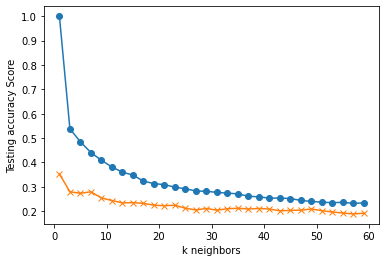

In [40]:
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [41]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train, y_train)
print('k49 Test Acc: %.3f' % knn.score(X_test, y_test))

k49 Test Acc: 0.209
